In [182]:
# reading and manipulating data
import pandas as pd
# for plotting
import seaborn as sbn
import matplotlib.pyplot as plt

# model
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC


/home/whoami/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


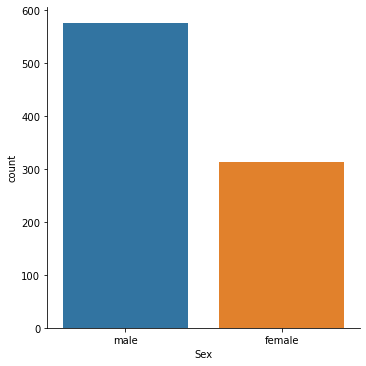

In [183]:
# load data
data=pd.read_csv('titanic/train.csv')

sbn.catplot('Sex', data=data, kind='count')

/home/whoami/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


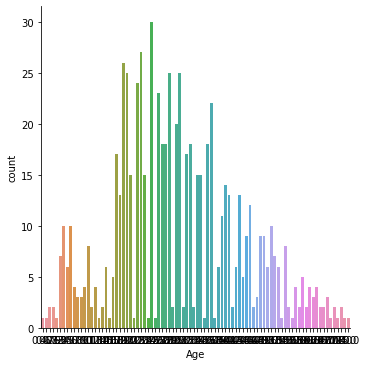

In [184]:
sbn.catplot('Age', data = data, kind='count')

In [185]:
#preprocessing
avg = data['Age'].mean()
avg


        


29.69911764705882

In [186]:
def replace_null(n):
    if n is None:
        return avg
    else:
        return n


In [187]:
data['Age'] = data['Age'].fillna(avg)
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [188]:
y = data['Survived']
def change_sex(m):
    if m=='male':
        return 0
    else:
        return 1
    

In [189]:
data['Sex'] = data['Sex'].apply(change_sex)
data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [190]:
x = data.drop(axis=1,columns=['PassengerId','Name','Ticket','Cabin','Embarked','Survived'])
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,3,1,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,3,1,29.699118,1,2,23.4500
889,1,0,26.000000,0,0,30.0000


In [191]:
test = pd.read_csv('titanic/test.csv')
test
                   

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [192]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [193]:
x_train.count()


Pclass    712
Sex       712
Age       712
SibSp     712
Parch     712
Fare      712
dtype: int64

In [194]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [195]:
x_train.shape

(712, 6)

In [196]:
#training the model
model = SVC()
model.fit(x_train,y_train)


SVC()

In [197]:
prediction = model.predict(x_test)

In [198]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [199]:
from sklearn.neighbors.classification import KNeighborsClassifier

In [200]:
#init neighbors model
neighborsModel= KNeighborsClassifier()
neighborsModel.fit(x_train,y_train
                  )

KNeighborsClassifier()

In [201]:
prediction = neighborsModel.predict(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

